<a href="https://colab.research.google.com/github/mleyvaz/CursoMachineLearning/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret
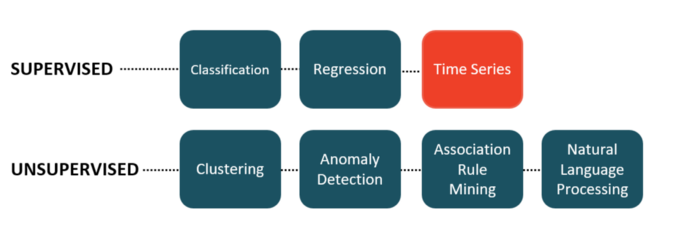

# Intalación

In [7]:
pip install pycaret

# Ciclo de vida de un proyecto de Machine Learning
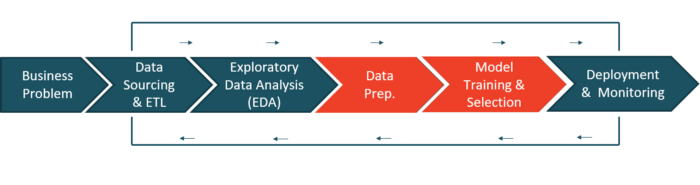

# Problema Comprar un Diamante

Datos

In [8]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

Análisis exploratorio se datos

In [9]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

Preparacion de los datos

In [10]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

Description           Value
0                               session_id            7363
1                                   Target           Price
2                            Original Data       (6000, 8)
3                           Missing Values           False
4                         Numeric Features               1
5                     Categorical Features               6
6                         Ordinal Features           False
7                High Cardinality Features           False
8                  High Cardinality Method            None
9                    Transformed Train Set      (4199, 28)
10                    Transformed Test Set      (1801, 28)
11                      Shuffle Train-Test            True
12                     Stratify Train-Test           False
13                          Fold Generator           KFold
14                             Fold Number              10
15                                CPU Jobs              -1
16                                 Use GPU           False
17                          Log Experiment            True
18                         Experiment Name         diamond
19                                     USI            8305
20                         Imputation Type          simple
21          Iterative Imputation Iteration            None
22                         Numeric Imputer            mean
23      Iterative Imputation Numeric Model            None
24                     Categorical Imputer        constant
25  Iterative Imputation Categorical Model            None
26           Unknown Categoricals Handling  least_frequent
27                               Normalize           False
28                        Normalize Method            None
29                          Transformation           False
30                   Transformation Method            None
31                                     PCA           False
32                              PCA Method            None
33                          PCA Components            None
34                     Ignore Low Variance           False
35                     Combine Rare Levels           False
36                    Rare Level Threshold            None
37                         Numeric Binning           False
38                         Remove Outliers           False
39                      Outliers Threshold            None
40                Remove Multicollinearity           False
41             Multicollinearity Threshold            None
42                              Clustering           False
43                    Clustering Iteration            None
44                     Polynomial Features           False
45                       Polynomial Degree            None
46                    Trignometry Features           False
47                    Polynomial Threshold            None
48                          Group Features           False
49                       Feature Selection           False
50                Feature Selection Method         classic
51            Features Selection Threshold            None
52                     Feature Interaction           False
53                           Feature Ratio           False
54                   Interaction Threshold            None
55                        Transform Target            True
56                 Transform Target Method         box-cox

Seleccionar Modelo 

In [11]:
# compare all models
best = compare_models()

Model         MAE           MSE  \
lightgbm  Light Gradient Boosting Machine    651.8335  2.029657e+06   
et                  Extra Trees Regressor    746.2388  2.440655e+06   
rf                Random Forest Regressor    742.9417  2.541721e+06   
gbr           Gradient Boosting Regressor    760.1007  2.568305e+06   
dt                Decision Tree Regressor    988.1456  4.482100e+06   
ada                    AdaBoost Regressor   1994.6426  1.671735e+07   
knn                 K Neighbors Regressor   3049.3410  3.527388e+07   
omp           Orthogonal Matching Pursuit   3330.1154  7.954867e+07   
lasso                    Lasso Regression   6587.2261  1.171906e+08   
en                            Elastic Net   6587.2261  1.171906e+08   
llar         Lasso Least Angle Regression   6587.2266  1.171906e+08   
ridge                    Ridge Regression   3845.6880  1.189843e+09   
huber                     Huber Regressor   3902.0945  1.276585e+09   
br                         Bayesian Ridge   3938.0099  1.369315e+09   
lr                      Linear Regression   4033.2027  1.659772e+09   
par          Passive Aggressive Regressor  33550.4674  2.220114e+12   

                 RMSE          R2   RMSLE    MAPE  TT (Sec)  
lightgbm    1407.5765      0.9805  0.0669  0.0493     0.134  
et          1552.2406      0.9765  0.0774  0.0575     1.274  
rf          1579.1202      0.9756  0.0769  0.0565     1.193  
gbr         1578.6350      0.9753  0.0753  0.0565     0.292  
dt          2094.2082      0.9570  0.1032  0.0749     0.039  
ada         4052.0618      0.8408  0.1862  0.1515     0.260  
knn         5912.4497      0.6609  0.3639  0.2342     0.093  
omp         8877.3651      0.2215  0.2824  0.2216     0.027  
lasso      10804.6088     -0.1231  0.7149  0.5661     0.028  
en         10804.6088     -0.1231  0.7149  0.5661     0.027  
llar       10804.6071     -0.1231  0.7149  0.5661     0.270  
ridge      25875.8750     -9.5180  0.2286  0.1774     0.026  
huber      27169.7522    -10.6489  0.2306  0.1761     0.126  
br         27488.3743    -11.2105  0.2296  0.1785     0.030  
lr         29369.8861    -13.9487  0.2303  0.1797     0.314  
par       551730.8706 -21262.1732  0.3613  0.5789     0.031

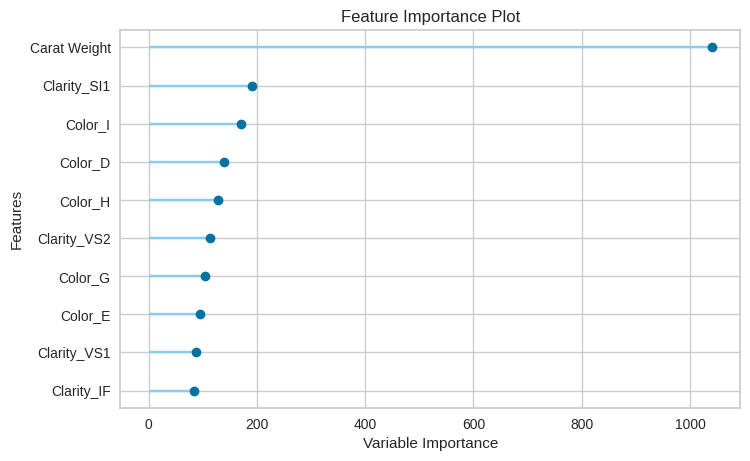

In [12]:
# check feature importance
plot_model(best, plot = 'feature')

Guardar  Modelo 

In [13]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    